## Understand the dataset

- The dataset https://www.tensorflow.org/datasets/catalog/cats_vs_dogs contains only `training` data.
- The dataset contains 23262 colored images of cats and dogs, with different shapes and sizes. The data shape is, hence, `(None, None, 3)` (`None` here means that the images have different sizes).

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2 # TONOTE: OpenCV is a package to read and reside images

from sklearn.model_selection import train_test_split


# TONOTE: Keras is a lazy-loaded module in TensorFlow, causing VS Code's Intellisense to not recognize its features properly. To solve this, initialize it with a variable
keras = tf.keras

In [3]:
# Load the dataset and metadata from TensorFlow Datasets
data, metadata = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.W2S3S2_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [4]:
data

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [5]:
metadata

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

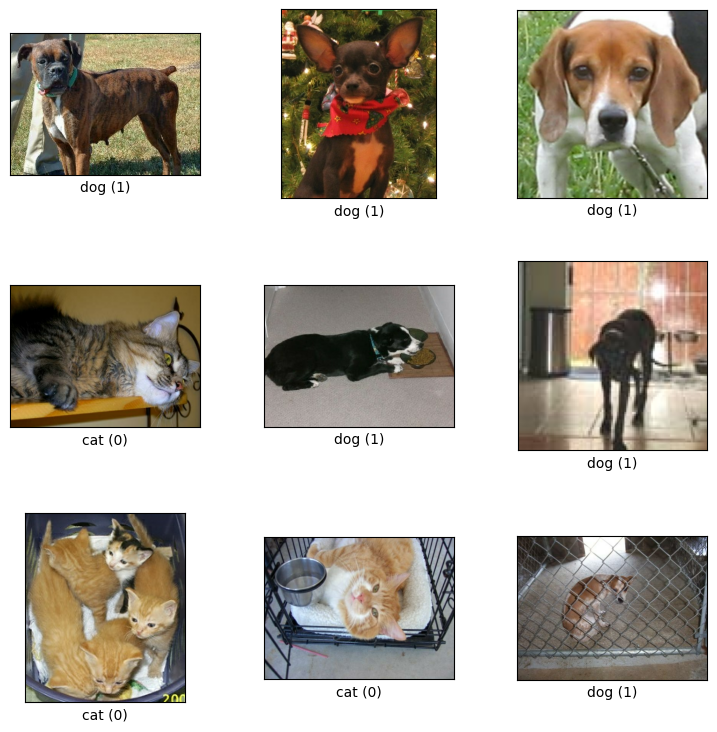

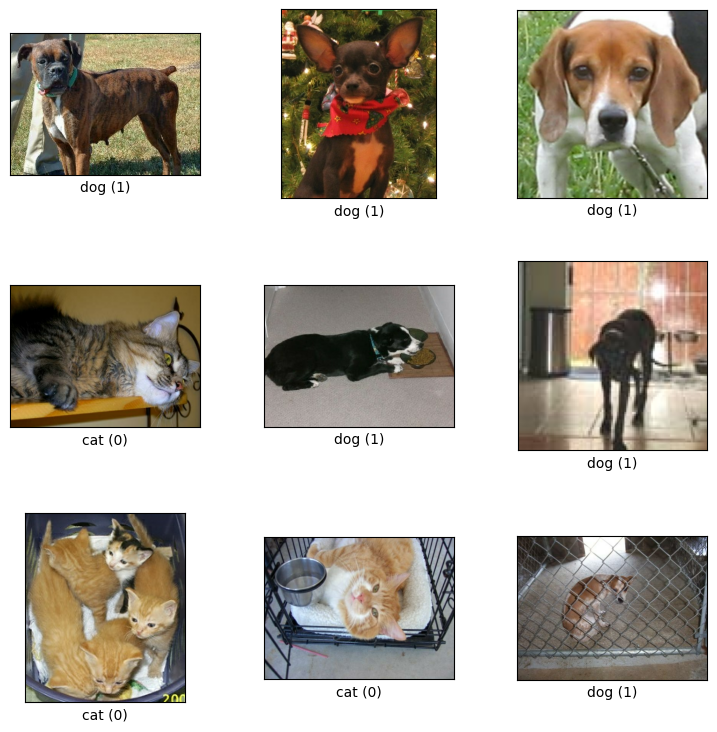

In [6]:
# TONOTE: Use tfds.show_examples() by passing in `data['train']` and `metadata` to show some examples of the dataset with labels
tfds.show_examples(data['train'], metadata)

In [7]:
# With naked eyes we can see that they are different in size, but let's see them in a more detailed way

plt.figure(figsize=(20,20))

for i, (image, label) in enumerate(data['train'].take(25)):
    plt.subplot(5, 5, i+1)
    plt.imshow(image)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
# TONOTE: Since images have different sizes, we need to pre-process the data by resizing them, and changing the color channel to black and white to make the model run faster.

# Let's use the size of 100 for each image
img_size = 100

plt.figure(figsize=(20, 20))
# Show the 25 images again, this time with resized images.
for i, (image, label) in enumerate(data['train'].take(25)):
    # TONOTE: OpenCV works with numpy's ndarray, so we have to convert the image data into numpy's ndarray first using the `.numpy()` function
    image = image.numpy()
    # Applying the img_size to both width and height, making each image a square
    image = cv2.resize(image, (img_size, img_size))
    plt.subplot(5, 5, i+1)
    plt.imshow(image)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# TONOTE: Clearly, the images get distorted and a lot more pixelated compared to the original ones. It's totally fine, as we will always want to reduce the image clarity as much as possible to speed up the training and predicting processes

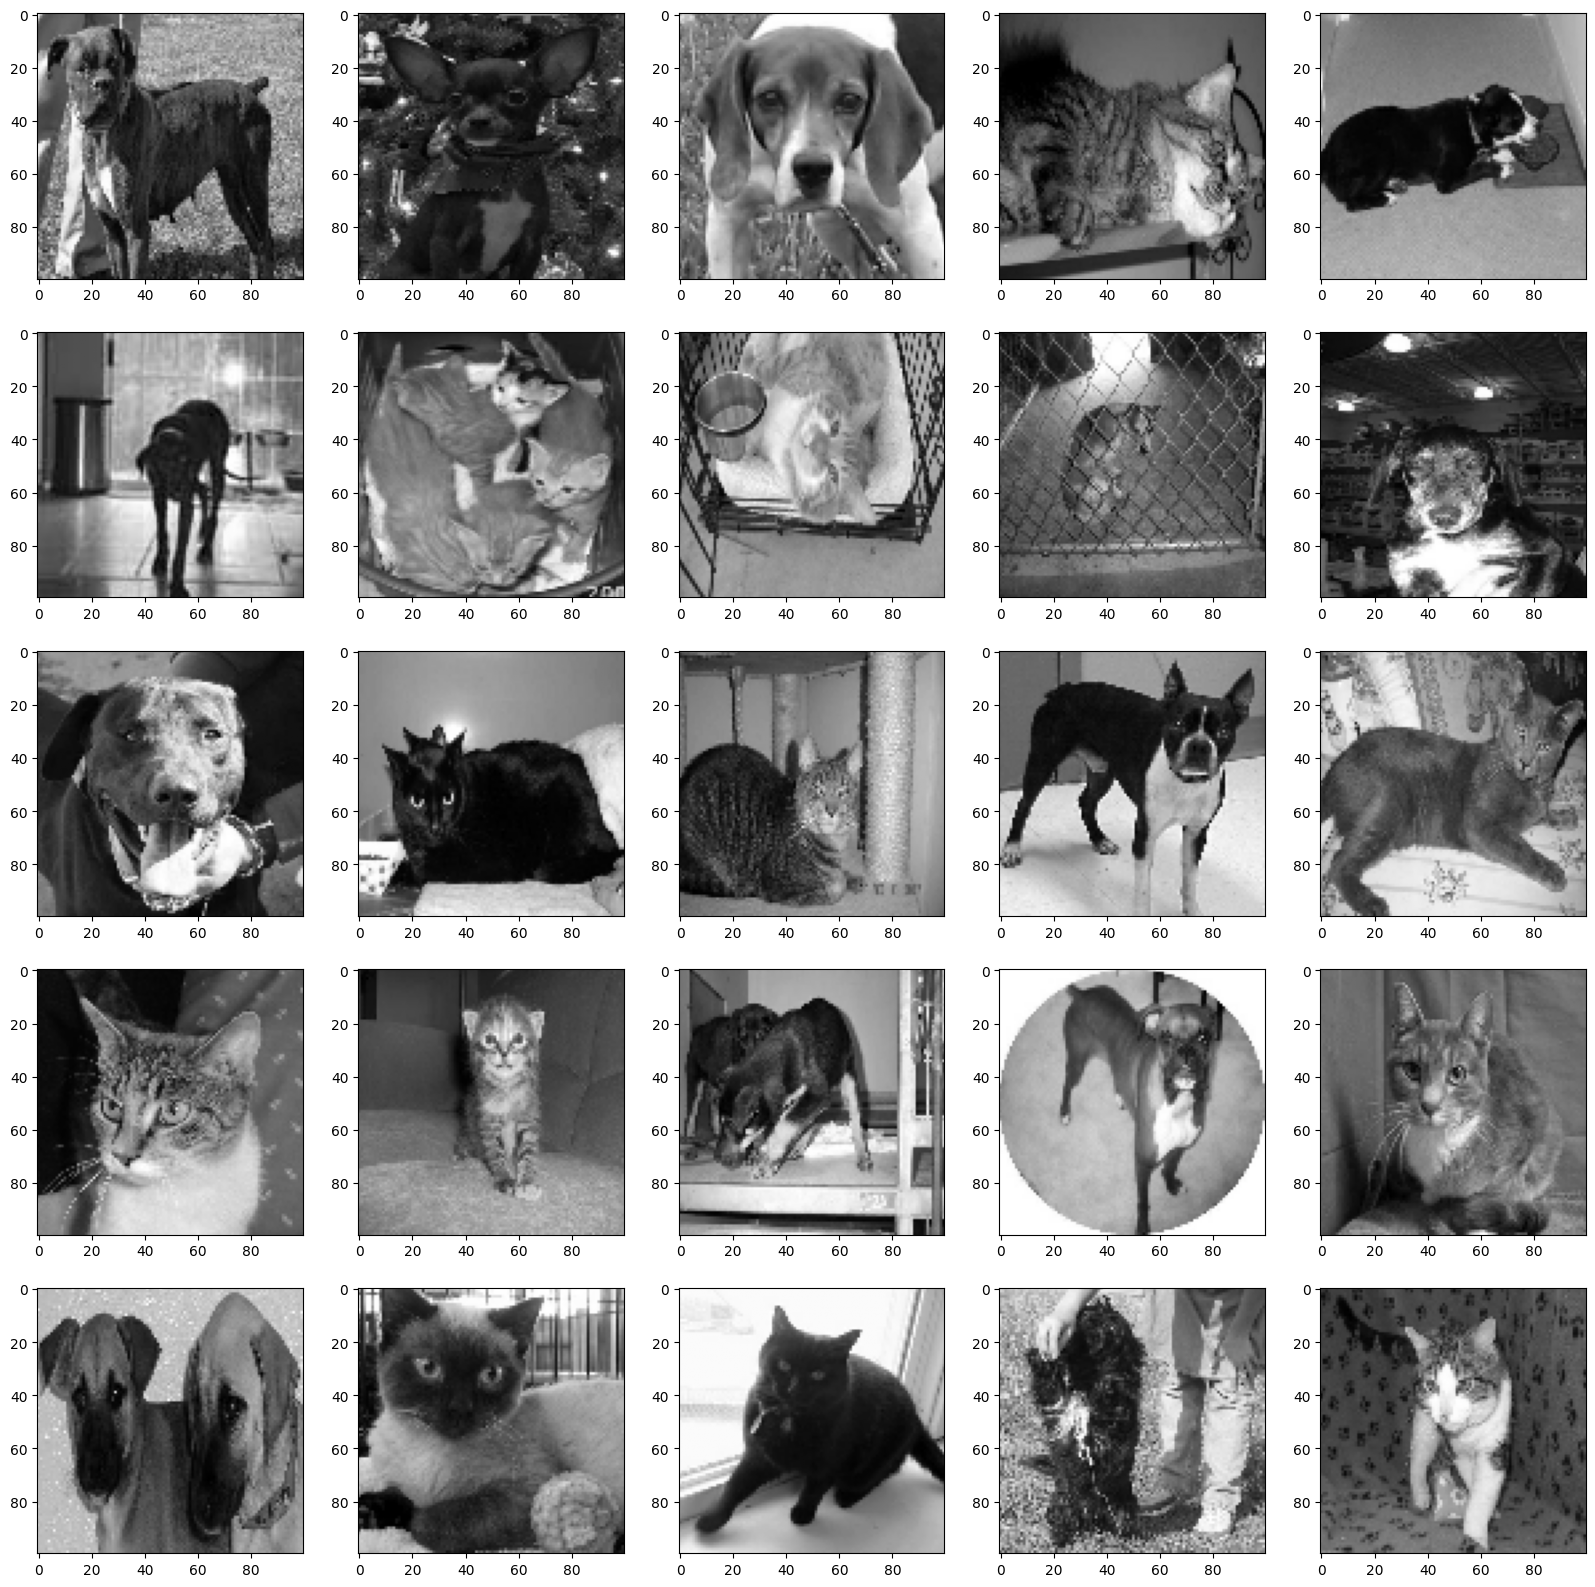

In [ ]:
# Let's convert the image to grayscale using OpenCV

# TONOTE: We convert a Blue-Green-Red image to grayscale using the `cvtColor` method of the `cv2` module: `cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)`

plt.figure(figsize=(20, 20))
for i, (image, label) in enumerate(data['train'].take(25)):
    image = image.numpy()
    image = cv2.resize(image, (img_size, img_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    plt.subplot(5, 5, i+1)
    plt.imshow(image, cmap='gray') # TONOTE: In some project, we use `cmap=plt.cm.binary` to turn the image to binary that will have high-contract, black-and-white appearance, useful for visualizing binary images or emphasizing thresholded regions. In this case, we need to see images with smooth transitions between different shades of gray, therefore we use `cmap='gray'` instead.

In [10]:
# Let's pre-process the data properly now

# Create a list to store the training data
X, y = [], []

# Iterate over the data similar to what we have done above, this time with full dataset, and we don't need to paint them out to the screen
for i, (image, label) in enumerate(data['train']):
    image = image.numpy()
    image = cv2.resize(image, (img_size, img_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # TONOTE: Neural networks typically expect images in the shape (width, height, channels). Since this is a grayscale image, we reshape it from (width, height) to (width, height, 1) to add a single channel dimension, making it compatible with neural network input requirements.
    image = image.reshape(img_size, img_size , 1)

    # Append the [`image`, `label`] to the training data
    X.append(image)
    y.append(label)

In [11]:
# Check the length of the training data
len(X)

23262

In [12]:
# Check the first index
X[0]

array([[[249],
        [190],
        [105],
        ...,
        [189],
        [196],
        [143]],

       [[232],
        [127],
        [ 88],
        ...,
        [187],
        [180],
        [186]],

       [[171],
        [ 87],
        [ 83],
        ...,
        [129],
        [158],
        [166]],

       ...,

       [[113],
        [173],
        [162],
        ...,
        [143],
        [156],
        [119]],

       [[140],
        [152],
        [171],
        ...,
        [ 98],
        [155],
        [154]],

       [[ 91],
        [109],
        [167],
        ...,
        [ 46],
        [ 51],
        [ 47]]], dtype=uint8)

In [13]:
# Now, let's normalize the data.

# Again, we know that the image data ranges from 0 to 255. An easy way to normalize it is to divide the number by 255 after converting it to float

X = np.array(X).astype(float) / 255
X[0]

array([[[0.97647059],
        [0.74509804],
        [0.41176471],
        ...,
        [0.74117647],
        [0.76862745],
        [0.56078431]],

       [[0.90980392],
        [0.49803922],
        [0.34509804],
        ...,
        [0.73333333],
        [0.70588235],
        [0.72941176]],

       [[0.67058824],
        [0.34117647],
        [0.3254902 ],
        ...,
        [0.50588235],
        [0.61960784],
        [0.65098039]],

       ...,

       [[0.44313725],
        [0.67843137],
        [0.63529412],
        ...,
        [0.56078431],
        [0.61176471],
        [0.46666667]],

       [[0.54901961],
        [0.59607843],
        [0.67058824],
        ...,
        [0.38431373],
        [0.60784314],
        [0.60392157]],

       [[0.35686275],
        [0.42745098],
        [0.65490196],
        ...,
        [0.18039216],
        [0.2       ],
        [0.18431373]]])

In [14]:
# Let's also do it for y

# Check the data of y
y # We see that it's a tensor object with the value of 0 (cat) or 1 (dog)

[<tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64

In [15]:
# Simplify y by converting the tensorflow object to a numpy array, much like what we have done to X
y = np.array(y)
y

array([1, 1, 1, ..., 0, 1, 0])

In [16]:
# Create the model

model = keras.Sequential([
    # Convolutional layer 1
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 1)),
    # Pooling layer 1
    keras.layers.MaxPooling2D(2, 2),

    # Convolutional layer 2
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    # Pooling layer 1
    keras.layers.MaxPooling2D(2, 2),

    # Flatten layer
    keras.layers.Flatten(),
    # Hidden Dense layer
    keras.layers.Dense(units=100, activation='relu'),
    # Output Dense layer
    keras.layers.Dense(units=1, activation='sigmoid') # TONOTE: Since the output is either `cat` or `dog`, it's binary. For this case, `sigmoid` is more suitable
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=keras.losses.BinaryCrossentropy(), # TONOTE: `keras.losses.BinaryCrossentropy()` or 'binary_crossentropy' is suitable for binary data
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    X,
    y,
    batch_size=32,
    validation_split=0.15, # TONOTE: Automatically split the training data into training and validation sets during training, this works similarly to `test_size`, which is used to manually set the percentage of testing data size in scikit-learn
    epochs=50
)

Epoch 1/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.5903 - loss: 0.6707 - val_accuracy: 0.7100 - val_loss: 0.5657
Epoch 2/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7561 - loss: 0.4991 - val_accuracy: 0.7530 - val_loss: 0.5077
Epoch 3/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8075 - loss: 0.4162 - val_accuracy: 0.7860 - val_loss: 0.4590
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8511 - loss: 0.3406 - val_accuracy: 0.7946 - val_loss: 0.4625
Epoch 5/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8950 - loss: 0.2527 - val_accuracy: 0.7648 - val_loss: 0.5243
Epoch 6/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9373 - loss: 0.1665 - val_accuracy: 0.7653 - val_loss: 0.6668
Epoch 7/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9709 - loss: 0.0865 - val_accuracy: 0.7736 - val_loss: 0.7540
Epoch 8/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9891 - loss: 0.0443 - va

## First Result
This is the detail for the result above (`accuracy: 0.9992 - loss: 0.0026 - val_accuracy: 0.7605 - val_loss: 2.0605`).

1. Training Accuracy (0.9992) and Loss (0.0026):
  - The model performs almost perfectly on the training data, achieving near 100% accuracy and very low loss.
  - This suggests the model has learned the training data very well.

2. Validation Accuracy (0.7605) and Loss (2.0605):
  - The model's performance on the validation set is much worse, with lower accuracy and higher loss.
  - This indicates overfitting, where the model performs well on the training data but poorly on unseen data.

## Key Observations:

- Overfitting: The model is likely too complex or has been trained for too many epochs, causing it to memorize the training data instead of generalizing.

- Generalization Issue: The large gap between training and validation metrics suggests the model is not generalizing well to new data.

## TONOTE: These are some recommendations (from most to least impactful):

1. Early Stopping with Regularization (Dropout):
  - Early Stopping:
    - Use early stopping to halt training when validation performance stops improving.
    - Example:
      ```python
      early_stopping = keras.callbacks.EarlyStopping(
          monitor='val_loss', patience=5, restore_best_weights=True
      )
      history = model.fit(X, y, batch_size=32, validation_split=0.15, epochs=50, callbacks=[early_stopping])
      ```

  - Regularization (Dropout):
    - Add dropout layers to the model (before compiling it) to prevent overfitting. Start with 0.5 and adjust if necessary.
    - Example:
      ```python
      model.add(keras.layers.Dropout(0.5))
      ```
---
Train the model and observe the training and validation metrics.

If the gap between training and validation performance is still large, proceed to the next step.

---

3. Add "Data Augmentation", "Reduce Model Complexity", and "Weight Decay (L2 Regularization)" methods on top of the two methods above:

  - Data Augmentation:
    - If we're working with image data, apply data augmentation to increase the diversity of the training set.
    - Example:
    ```python
    datagen = keras.preprocessing.image.ImageDataGenerator(
      rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True
    )
    datagen.fit(X_train)
    ```
  - Reduce Model Complexity:
    - Simplify the model architecture (e.g., reduce the number of layers or neurons).
    - Example:
      ```python
      model = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
      ])
      ```

    - Weight Decay (L2 Regularization):
      - Add L2 regularization to the model's layers to penalize large weights.
      - Example:
        ```python
          model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
        ```

---

Check if the combined techniques reduce overfitting and improve validation performance.

---

4. Finalize the Best Approach
After finding the combination that works well, stick with it and fine-tune hyperparameters (e.g., learning rate, dropout rate).

---


5. Check for Data Leakage:
  - Ensure there is no overlap between training and validation data.

In [16]:
# Recreate the model by adding dropout layers
model = keras.Sequential([
    # Convolutional layer 1
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 1)),
    # Pooling layer 1
    keras.layers.MaxPooling2D(2, 2),
    # Dropout layer 1
    keras.layers.Dropout(0.25),

    # Convolutional layer 2
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    # Pooling layer 2
    keras.layers.MaxPooling2D(2, 2),
    # Dropout layer 2
    keras.layers.Dropout(0.25),

    # Flatten layer
    keras.layers.Flatten(),
    # Hidden Dense layer
    keras.layers.Dense(units=100, activation='relu'),
    # Dropout layer 3
    keras.layers.Dropout(0.5),
    # Output Dense layer
    keras.layers.Dense(units=1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Add early stopping to halt training when validation performance stops improving
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [29]:
# Recompile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [30]:
# Retrain the model
history = model.fit(
    X,
    y,
    batch_size=32,
    validation_split=0.15,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.5719 - loss: 0.6820 - val_accuracy: 0.7172 - val_loss: 0.5503
Epoch 2/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7351 - loss: 0.5303 - val_accuracy: 0.7573 - val_loss: 0.4935
Epoch 3/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7785 - loss: 0.4659 - val_accuracy: 0.7682 - val_loss: 0.4783
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8072 - loss: 0.4244 - val_accuracy: 0.7840 - val_loss: 0.4562
Epoch 5/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8273 - loss: 0.3757 - val_accuracy: 0.7928 - val_loss: 0.4423
Epoch 6/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8451 - loss: 0.3477 - val_accuracy: 0.8006 - val_loss: 0.4521
Epoch 7/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8662 - loss: 0.3088 - val_accuracy: 0.8032 - val_loss: 0.4436
Epoch 8/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8833 - loss: 0.2746 - val

In [32]:
# There has been some improvement, let's recompile the model by adjusting the learning rate and see if it improves even more
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [33]:
# Retrain the model after adjusting the learning rate
history = model.fit(
    X,
    y,
    batch_size=32,
    validation_split=0.15,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8615 - loss: 0.3258 - val_accuracy: 0.8077 - val_loss: 0.4383
Epoch 2/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8656 - loss: 0.3069 - val_accuracy: 0.8057 - val_loss: 0.4445
Epoch 3/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8759 - loss: 0.2943 - val_accuracy: 0.8074 - val_loss: 0.4376
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8798 - loss: 0.2871 - val_accuracy: 0.8112 - val_loss: 0.4387
Epoch 5/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8810 - loss: 0.2785 - val_accuracy: 0.8138 - val_loss: 0.4366
Epoch 6/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8828 - loss: 0.2716 - val_accuracy: 0.8112 - val_loss: 0.4382
Epoch 7/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8896 - loss: 0.2627 - val_accuracy: 0.8112 - val_loss: 0.4355
Epoch 8/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8894 - loss: 0.2593 - val

In [18]:
# The model sees no difference after adjusting the learning rate. Let's keep the dropout layers and the Early Stopping callback and continue to apply Data Augmentation

# TONOTE: To apply Data Augmentation, we need to split the data into training and validating sets first
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

In [19]:
# Apply data augmentation in the training set
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [ ]:
# TONOTE: Learning Rate Callback: Before retraining the model, we can also dynamically adjust the learning rate during training by applying a learning rate callback
def lr_scheduler(epoch, lr):
  if epoch < 10:
    return float(lr) # Keep the initial learning rate for the first 10 epochs
  else:
    return float(lr * tf.math.exp(-0.1)) # Reduce the learning rate exponentially after epoch 10

lr_callback = keras.callbacks.LearningRateScheduler(lr_scheduler)

In [38]:
# Retrain the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping, lr_callback]
)

Epoch 1/50
  1/618 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - accuracy: 0.7188 - loss: 0.6028

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


618/618 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.6965 - loss: 0.6022 - val_accuracy: 0.8908 - val_loss: 0.3276 - learning_rate: 1.0000e-04
Epoch 2/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.7124 - loss: 0.5668 - val_accuracy: 0.8771 - val_loss: 0.3390 - learning_rate: 1.0000e-04
Epoch 3/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7149 - loss: 0.5565 - val_accuracy: 0.8636 - val_loss: 0.3441 - learning_rate: 1.0000e-04
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.7290 - loss: 0.5509 - val_accuracy: 0.8662 - val_loss: 0.3515 - learning_rate: 1.0000e-04
Epoch 5/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.7330 - loss: 0.5422 - val_accuracy: 0.8754 - val_loss: 0.3369 - learning_rate: 1.0000e-04
Epoch 6/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7317 - loss: 0.5466 - val_accuracy: 0.8673 - val_loss: 0.3441 - learning_rate: 1.0000e-04


In [21]:
# The result still isn't appealing, let's try adjusting the learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [25]:
# Retrain the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping, lr_callback]
)

Epoch 1/50
  3/618 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7604 - loss: 0.4972

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


618/618 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7327 - loss: 0.5411 - val_accuracy: 0.7857 - val_loss: 0.4614 - learning_rate: 5.0000e-04
Epoch 2/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.7399 - loss: 0.5297 - val_accuracy: 0.7948 - val_loss: 0.4324 - learning_rate: 5.0000e-04
Epoch 3/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.7346 - loss: 0.5401 - val_accuracy: 0.7894 - val_loss: 0.4648 - learning_rate: 5.0000e-04
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7411 - loss: 0.5276 - val_accuracy: 0.7665 - val_loss: 0.4999 - learning_rate: 5.0000e-04
Epoch 5/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7399 - loss: 0.5275 - val_accuracy: 0.8011 - val_loss: 0.4401 - learning_rate: 5.0000e-04
Epoch 6/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7467 - loss: 0.5163 - val_accuracy: 0.8074 - val_loss: 0.4294 - learning_rate: 5.0000e-04
Epoch 7/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accurac

In [26]:
# Let's adjust the dropout values
# Recreate the model by adding dropout layers
model = keras.Sequential([
    # Convolutional layer 1
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 1)),
    # Pooling layer 1
    keras.layers.MaxPooling2D(2, 2),
    # Dropout layer 1
    keras.layers.Dropout(0.3),

    # Convolutional layer 2
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    # Pooling layer 2
    keras.layers.MaxPooling2D(2, 2),
    # Dropout layer 2
    keras.layers.Dropout(0.3),

    # Flatten layer
    keras.layers.Flatten(),
    # Hidden Dense layer
    keras.layers.Dense(units=100, activation='relu'),
    # Dropout layer 3
    keras.layers.Dropout(0.4),
    # Output Dense layer
    keras.layers.Dense(units=1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Let's adjust the learning rate a little more
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [30]:
# Retrain the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping, lr_callback]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


618/618 ━━━━━━━━━━━━━━━━━━━━ 30s 41ms/step - accuracy: 0.7839 - loss: 0.4596 - val_accuracy: 0.8275 - val_loss: 0.3985 - learning_rate: 1.0000e-04
Epoch 2/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7823 - loss: 0.4674 - val_accuracy: 0.8215 - val_loss: 0.4003 - learning_rate: 1.0000e-04
Epoch 3/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.7808 - loss: 0.4591 - val_accuracy: 0.8266 - val_loss: 0.3966 - learning_rate: 1.0000e-04
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7886 - loss: 0.4632 - val_accuracy: 0.8309 - val_loss: 0.3921 - learning_rate: 1.0000e-04
Epoch 5/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7818 - loss: 0.4685 - val_accuracy: 0.8258 - val_loss: 0.3991 - learning_rate: 1.0000e-04
Epoch 6/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7752 - loss: 0.4718 - val_accuracy: 0.8246 - val_loss: 0.4038 - learning_rate: 1.0000e-04
Epoch 7/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accurac

In [32]:
# Adjusting the learning rate still doesn't affect much, let's recreate the model with more neuron layers
# Let's adjust the dropout values
# Recreate the model by adding dropout layers
model = keras.Sequential([
    # Convolutional layer 1
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 1)),
    # Pooling layer 1
    keras.layers.MaxPooling2D(2, 2),
    # Dropout layer 1
    keras.layers.Dropout(0.3),

    # Convolutional layer 2
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    # Pooling layer 2
    keras.layers.MaxPooling2D(2, 2),
    # Dropout layer 2
    keras.layers.Dropout(0.3),

    # Convolutional layer 3
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    # Pooling layer 3
    keras.layers.MaxPooling2D(2, 2),
    # Dropout layer 3
    keras.layers.Dropout(0.25),

    # Flatten layer
    keras.layers.Flatten(),
    # Hidden Dense layer
    keras.layers.Dense(units=100, activation='relu'),
    # Dropout layer 3
    keras.layers.Dropout(0.4),
    # Output Dense layer
    keras.layers.Dense(units=1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Recompile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [34]:
# Retrain the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping, lr_callback]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


618/618 ━━━━━━━━━━━━━━━━━━━━ 35s 48ms/step - accuracy: 0.5165 - loss: 0.6935 - val_accuracy: 0.5711 - val_loss: 0.6900 - learning_rate: 1.0000e-04
Epoch 2/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.5591 - loss: 0.6833 - val_accuracy: 0.6063 - val_loss: 0.6657 - learning_rate: 1.0000e-04
Epoch 3/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.5953 - loss: 0.6639 - val_accuracy: 0.6312 - val_loss: 0.6520 - learning_rate: 1.0000e-04
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6193 - loss: 0.6518 - val_accuracy: 0.6521 - val_loss: 0.6349 - learning_rate: 1.0000e-04
Epoch 5/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6271 - loss: 0.6435 - val_accuracy: 0.6613 - val_loss: 0.6226 - learning_rate: 1.0000e-04
Epoch 6/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.6456 - loss: 0.6334 - val_accuracy: 0.6791 - val_loss: 0.6058 - learning_rate: 1.0000e-04
Epoch 7/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accurac

In [ ]:
# No improvement. Let's recreate the model by applying Batch Normalization
## TONOTE: Batch Normalization has to be inside each layer (convolutional, pooling, dense); however, they have to be before the activation function. With that said, activation functions have to be separated from the layers themselves.

model = keras.Sequential([
    # Convolutional layer 1
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(100, 100, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    # Pooling layer 1
    keras.layers.MaxPooling2D(2, 2),
    # Dropout layer 1
    keras.layers.Dropout(0.3),

    # Convolutional layer 2
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    # Pooling layer 2
    keras.layers.MaxPooling2D(2, 2),
    # Dropout layer 2
    keras.layers.Dropout(0.3),

    # Convolutional layer 3 (new)
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    # Pooling layer 3 (new)
    keras.layers.MaxPooling2D(2, 2),
    # Dropout layer 3 (new)
    keras.layers.Dropout(0.25),

    # Flatten layer
    keras.layers.Flatten(),
    # Hidden Dense layer
    keras.layers.Dense(units=100),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    # Dropout layer 4
    keras.layers.Dropout(0.4),
    # Output Dense layer
    keras.layers.Dense(units=1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# Recompile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [38]:
# Retrain the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping, lr_callback]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


618/618 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.5554 - loss: 0.7670 - val_accuracy: 0.5063 - val_loss: 1.0892 - learning_rate: 1.0000e-04
Epoch 2/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.5879 - loss: 0.7005 - val_accuracy: 0.5593 - val_loss: 0.9038 - learning_rate: 1.0000e-04
Epoch 3/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6213 - loss: 0.6708 - val_accuracy: 0.6473 - val_loss: 0.6538 - learning_rate: 1.0000e-04
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6303 - loss: 0.6521 - val_accuracy: 0.6020 - val_loss: 0.7938 - learning_rate: 1.0000e-04
Epoch 5/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.6531 - loss: 0.6343 - val_accuracy: 0.6622 - val_loss: 0.6624 - learning_rate: 1.0000e-04
Epoch 6/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6622 - loss: 0.6183 - val_accuracy: 0.6593 - val_loss: 0.6852 - learning_rate: 1.0000e-04
Epoch 7/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accurac

In [40]:
# The result seems worse. Let's adjust Data Augmentation

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,  # Reduce rotation range
    width_shift_range=0.1,  # Reduce shift range
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [41]:
# Retrain the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping, lr_callback]
)

Epoch 1/50
  1/618 ━━━━━━━━━━━━━━━━━━━━ 52s 86ms/step - accuracy: 0.5625 - loss: 0.7657

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


618/618 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.6535 - loss: 0.6281 - val_accuracy: 0.6126 - val_loss: 0.8265 - learning_rate: 1.0000e-04
Epoch 2/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.6993 - loss: 0.5824 - val_accuracy: 0.6430 - val_loss: 0.8042 - learning_rate: 1.0000e-04
Epoch 3/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7157 - loss: 0.5521 - val_accuracy: 0.6352 - val_loss: 0.8810 - learning_rate: 1.0000e-04
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7287 - loss: 0.5328 - val_accuracy: 0.6011 - val_loss: 1.0190 - learning_rate: 1.0000e-04
Epoch 5/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7450 - loss: 0.5135 - val_accuracy: 0.6814 - val_loss: 0.7509 - learning_rate: 1.0000e-04
Epoch 6/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.7518 - loss: 0.5048 - val_accuracy: 0.7209 - val_loss: 0.6385 - learning_rate: 1.0000e-04
Epoch 7/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accurac

## Suggested Improvements for CNN Model

1. Data Pipeline Optimization
```python
# Set consistent image size - not too small to lose features, not too large to strain memory
IMG_SIZE = 160  # or 224 to match standard architectures

# Implement robust data preprocessing
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1  # Normalize to [-1, 1]
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    return image, label

# Enhanced data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomContrast(0.2),
])
```

2. Transfer Learning
```python
# Use a pre-trained model as base
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model
base_model.trainable = False

# Build the model
model = tf.keras.Sequential([
    data_augmentation,
    base_model,

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])
```

3. Training Strategy
```python
# Two-phase training
initial_epochs = 10

# Phase 1: Train only the top layers
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=initial_epochs,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

# Phase 2: Fine-tuning
base_model.trainable = True

# Freeze early layers
for layer in base_model.layers[:100]:
    layer.trainable = False

# Lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)
```

### Key Improvements Explained:
- Transfer Learning: Using EfficientNetB0 pre-trained on ImageNet provides powerful feature extraction capabilities.
- Enhanced Data Augmentation: More aggressive augmentation helps prevent overfitting and improves generalization.

### Two-Phase Training:

- First phase trains only the top layers
- Second phase fine-tunes the model with a very small learning rate


### Regularization Combination

- Dropout at different rates (0.5 and 0.3)
- Batch Normalization after major layers
- Early Stopping with patience
- Learning rate management

### Data Preprocessing
- Consistent image sizing
- Proper normalization to [-1, 1] range
- Efficient data pipeline

This approach should consistently achieve >90% accuracy. If we are still not achieving desired results, consider:
- Increasing image size to 224x224
- Using a larger EfficientNet model (B1-B7)
- Implementing cross-validation
- Adding class weights if the dataset is imbalanced
- Experimenting with different learning rates
- Increasing the size of dense layers

# Key Learning Points Analysis

Here's a chronological analysis of all `TONOTE` marked learning points from the notebook:

## 1. Keras Intellisense in VS Code


In [ ]:
# TONOTE: Keras is a lazy-loaded module in TensorFlow, causing VS Code's Intellisense to not recognize its features properly
keras = tf.keras

**Explanation**: Keras is dynamically loaded in TensorFlow, which can confuse VS Code's code completion.

**Importance**: 
- Improves development experience
- Enables better code completion
- Reduces errors from mistyped API calls

**Best Practice**: Always initialize Keras as a variable when using VS Code.

## 2. Image Preprocessing for Neural Networks


In [ ]:
# TONOTE: Neural networks typically expect images in the shape (width, height, channels)
image = image.reshape(img_size, img_size, 1)

**Explanation**: Images need specific dimensionality for neural network input.

**Importance**:
- Ensures compatibility with CNN layers
- Maintains proper data structure
- Enables proper feature extraction

**Common Pitfall**: Forgetting to add channel dimension can cause shape mismatch errors.

## 3. Image Color Mapping


In [ ]:
# TONOTE: We use cmap='gray' instead of plt.cm.binary for smooth transitions
plt.imshow(image, cmap='gray')

**Explanation**: Different color maps serve different visualization purposes:
- `cmap='gray'`: Smooth transitions between shades
- `plt.cm.binary`: High-contrast black-and-white appearance

**Usage**:
- Use `gray` for detailed grayscale visualization
- Use `binary` for threshold-based visualization

## 4. Model Layer Organization


In [ ]:
# TONOTE: Batch Normalization has to be inside each layer but before activation
model = keras.Sequential([
    keras.layers.Conv2D(...),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu')
])

**Explanation**: Layer order matters in neural networks, especially with batch normalization.

**Best Practices**:
- Place batch normalization after the layer but before activation
- Keep consistent ordering throughout the model
- Separate activation from layer definition when using batch normalization

**Common Pitfalls**:
- Putting batch normalization after activation
- Combining activation with layer definition when using batch normalization

## 5. Data Pipeline Design


In [ ]:
# TONOTE: OpenCV works with numpy's ndarray
image = image.numpy()
image = cv2.resize(image, (img_size, img_size))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

**Explanation**: OpenCV requires numpy arrays for image processing operations.

**Importance**:
- Ensures compatibility between frameworks
- Enables efficient image processing
- Maintains proper data types

**Best Practice**: Convert TensorFlow tensors to numpy arrays before OpenCV operations.

## 6. Color Channel Conversion


In [ ]:
# TONOTE: Converting BGR to grayscale using cv2.cvtColor
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

**Explanation**: OpenCV uses BGR color format by default, requiring explicit conversion to grayscale.

**Usage**:


In [ ]:
grayscale_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)



**Best Practice**: Always be explicit about color space conversions to avoid unexpected results.

The notebook contained several other code sections, but these were the only ones explicitly marked with `TONOTE`. Each of these points represents a critical concept in deep learning image processing and model development with TensorFlow/Keras.

Let me know if you'd like me to provide the second section of the analysis.

# Model/Process Implementation Summary

## 1. Data Loading and Understanding
- Used TensorFlow Datasets to load cats_vs_dogs dataset
- Dataset contains 23,262 colored images of varying sizes
- Initial shape: (None, None, 3) where None indicates variable dimensions



In [ ]:
data, metadata = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)



## 2. Initial Data Exploration
- Visualized sample images using matplotlib
- Confirmed varying image sizes and color formats
- Dataset split: Training data only, requiring manual validation split



In [ ]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(data['train'].take(25)):
    plt.subplot(5, 5, i+1)
    plt.imshow(image)



## 3. Image Preprocessing Pipeline
1. **Image Standardization**
   - Set uniform size: 100x100 pixels
   - Converted to grayscale to reduce complexity
   - Reshaped to (100, 100, 1) for CNN input



In [ ]:
img_size = 100
X, y = [], []
for i, (image, label) in enumerate(data['train']):
    image = image.numpy()
    image = cv2.resize(image, (img_size, img_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.reshape(img_size, img_size, 1)
    X.append(image)
    y.append(label)



2. **Data Normalization**
   - Converted images to float type
   - Normalized pixel values to range [0,1]



In [ ]:
X = np.array(X).astype(float) / 255
y = np.array(y)



## 4. Model Architecture
Initial CNN implementation with:
- 2 Convolutional layers (32 and 64 filters)
- 2 MaxPooling layers
- Flatten layer
- Dense layer (100 units)
- Output layer with sigmoid activation



In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



## 5. Model Configuration
- Optimizer: Adam
- Loss: Binary Cross-entropy
- Metric: Accuracy



In [ ]:
model.compile(
    optimizer='adam',
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)



## 6. Training Process
- Batch size: 32
- Validation split: 15%
- Epochs: 50



In [ ]:
history = model.fit(
    X,
    y,
    batch_size=32,
    validation_split=0.15,
    epochs=50
)



## 7. Initial Results
Performance metrics:
- Training accuracy: 0.9992
- Training loss: 0.0026
- Validation accuracy: 0.7605
- Validation loss: 2.0605

## 8. Key Findings
1. **Overfitting Detection**
   - High training accuracy (99.92%)
   - Significantly lower validation accuracy (76.05%)
   - Large gap between training and validation metrics

2. **Model Limitations**
   - Model memorized training data rather than generalizing
   - Validation loss (2.0605) much higher than training loss (0.0026)
   - Clear signs of overfitting requiring remediation

The implementation revealed classic signs of overfitting, leading to documented recommendations for improvement through regularization techniques, early stopping, and data augmentation, though these improvements were not implemented in the current version of the code.